### we have cleaned the date and done some exploratory data analysis, we have a data frame which is ready for prerpocessing to be used for modelling

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
#import the dataset
data = pd.read_csv('/Users/gargi/Desktop/DSC_SB/adanced_ml/tf_dw.csv')

In [3]:
data.head()

,Unnamed: 0,text,label
0,0,"As U.S. budget fight looms, Republicans flip t...",1
1,1,U.S. military to accept transgender recruits o...,1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,3,FBI Russia probe helped by Australian diplomat...,1
4,4,Trump wants Postal Service to charge 'much mor...,1


In [4]:
#Punctuation Removal: 
#In this step, all the punctuations from the text are removed. string library of Python contains 
#some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’


In [29]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Punctuation removal


In [30]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['text']= data['text'].apply(lambda x:remove_punctuation(x))
data['text'][1]

'US military to accept transgender recruits on Monday Pentagon WASHINGTON Reuters  Transgender people will be allowed for the first time to enlist in the US military starting on Monday as ordered by federal courts the Pentagon said on Friday after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban Two federal appeals courts one in Washington and one in Virginia last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan 1 A Justice Department official said the administration will not challenge those rulings “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks So rather than litigate this interim appeal before that occurs the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District Court in the meant

### Lowering the text

In [31]:
data['text']= data['text'].apply(lambda x: x.lower())
data['text'][1]

'us military to accept transgender recruits on monday pentagon washington reuters  transgender people will be allowed for the first time to enlist in the us military starting on monday as ordered by federal courts the pentagon said on friday after president donald trump’s administration decided not to appeal rulings that blocked his transgender ban two federal appeals courts one in washington and one in virginia last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on jan 1 a justice department official said the administration will not challenge those rulings “the department of defense has announced that it will be releasing an independent study of these issues in the coming weeks so rather than litigate this interim appeal before that occurs the administration has decided to wait for dod’s study and will continue to defend the president’s lawful authority in district court in the meant

### Tokenization

In [32]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens
#applying function to the column
data['text']= data['text'].apply(lambda x: tokenization(x))
data['text'][1]

['us',
 'military',
 'to',
 'accept',
 'transgender',
 'recruits',
 'on',
 'monday',
 'pentagon',
 'washington',
 'reuters',
 'transgender',
 'people',
 'will',
 'be',
 'allowed',
 'for',
 'the',
 'first',
 'time',
 'to',
 'enlist',
 'in',
 'the',
 'us',
 'military',
 'starting',
 'on',
 'monday',
 'as',
 'ordered',
 'by',
 'federal',
 'courts',
 'the',
 'pentagon',
 'said',
 'on',
 'friday',
 'after',
 'president',
 'donald',
 'trump',
 's',
 'administration',
 'decided',
 'not',
 'to',
 'appeal',
 'rulings',
 'that',
 'blocked',
 'his',
 'transgender',
 'ban',
 'two',
 'federal',
 'appeals',
 'courts',
 'one',
 'in',
 'washington',
 'and',
 'one',
 'in',
 'virginia',
 'last',
 'week',
 'rejected',
 'the',
 'administration',
 's',
 'request',
 'to',
 'put',
 'on',
 'hold',
 'orders',
 'by',
 'lower',
 'court',
 'judges',
 'requiring',
 'the',
 'military',
 'to',
 'begin',
 'accepting',
 'transgender',
 'recruits',
 'on',
 'jan',
 '1',
 'a',
 'justice',
 'department',
 'official',
 'sa

### Stop word removal


In [33]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [34]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [35]:
#applying the function
data['text']= data['text'].apply(lambda x:remove_stopwords(x))

In [36]:
data['text'][1]

['us',
 'military',
 'accept',
 'transgender',
 'recruits',
 'monday',
 'pentagon',
 'washington',
 'reuters',
 'transgender',
 'people',
 'allowed',
 'first',
 'time',
 'enlist',
 'us',
 'military',
 'starting',
 'monday',
 'ordered',
 'federal',
 'courts',
 'pentagon',
 'said',
 'friday',
 'president',
 'donald',
 'trump',
 'administration',
 'decided',
 'appeal',
 'rulings',
 'blocked',
 'transgender',
 'ban',
 'two',
 'federal',
 'appeals',
 'courts',
 'one',
 'washington',
 'one',
 'virginia',
 'last',
 'week',
 'rejected',
 'administration',
 'request',
 'put',
 'hold',
 'orders',
 'lower',
 'court',
 'judges',
 'requiring',
 'military',
 'begin',
 'accepting',
 'transgender',
 'recruits',
 'jan',
 '1',
 'justice',
 'department',
 'official',
 'said',
 'administration',
 'challenge',
 'rulings',
 'department',
 'defense',
 'announced',
 'releasing',
 'independent',
 'study',
 'issues',
 'coming',
 'weeks',
 'rather',
 'litigate',
 'interim',
 'appeal',
 'occurs',
 'administration

### Stemming

In [37]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [38]:
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
#data['text']=data['text'].apply(lambda x: stemming(x))

### Lemmatization

In [39]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [40]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/gargi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
data['text']=data['text'].apply(lambda x:lemmatizer(x))

In [42]:
data['text'][1]

['u',
 'military',
 'accept',
 'transgender',
 'recruit',
 'monday',
 'pentagon',
 'washington',
 'reuters',
 'transgender',
 'people',
 'allowed',
 'first',
 'time',
 'enlist',
 'u',
 'military',
 'starting',
 'monday',
 'ordered',
 'federal',
 'court',
 'pentagon',
 'said',
 'friday',
 'president',
 'donald',
 'trump',
 'administration',
 'decided',
 'appeal',
 'ruling',
 'blocked',
 'transgender',
 'ban',
 'two',
 'federal',
 'appeal',
 'court',
 'one',
 'washington',
 'one',
 'virginia',
 'last',
 'week',
 'rejected',
 'administration',
 'request',
 'put',
 'hold',
 'order',
 'lower',
 'court',
 'judge',
 'requiring',
 'military',
 'begin',
 'accepting',
 'transgender',
 'recruit',
 'jan',
 '1',
 'justice',
 'department',
 'official',
 'said',
 'administration',
 'challenge',
 'ruling',
 'department',
 'defense',
 'announced',
 'releasing',
 'independent',
 'study',
 'issue',
 'coming',
 'week',
 'rather',
 'litigate',
 'interim',
 'appeal',
 'occurs',
 'administration',
 'decided'

### Convert the array to text

In [43]:
def text_convert(text_list):
    convert_text = " ".join(text_list)
    return convert_text
data['text']=data['text'].apply(lambda x:text_convert(x))

In [44]:
data['text'][1]

'u military accept transgender recruit monday pentagon washington reuters transgender people allowed first time enlist u military starting monday ordered federal court pentagon said friday president donald trump administration decided appeal ruling blocked transgender ban two federal appeal court one washington one virginia last week rejected administration request put hold order lower court judge requiring military begin accepting transgender recruit jan 1 justice department official said administration challenge ruling department defense announced releasing independent study issue coming week rather litigate interim appeal occurs administration decided wait dod study continue defend president lawful authority district court meantime official said speaking condition anonymity september pentagon said created panel senior official study implement directive trump prohibit transgender individual serving defense department feb 21 submit plan trump lawyer representing currentlyserving trans

#### I wil try to do some classification modelling (supervised) to understand to begin with. MultinomialNB is the probability based most common classifier for NLP, I will start with that. 

In [45]:
import sklearn
from sklearn.model_selection import train_test_split
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [46]:
x_train, x_test, y_train, y_test = train_test_split(data['text'],data['label'],test_size=0.2, random_state = 1)


### Multinomial NB

accuracy:   93.953


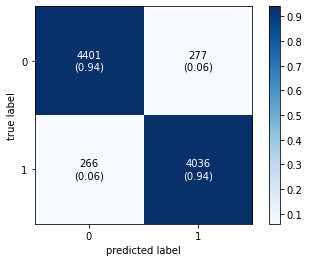

In [47]:

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### Support Vector Machine

accuracy:   99.443


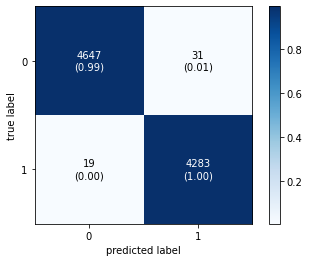

In [48]:

from sklearn.svm import LinearSVC
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

accuracy:   96.782


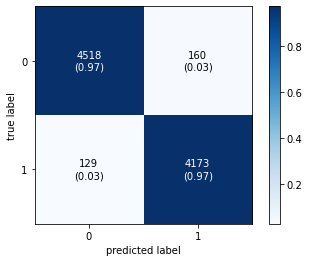

In [49]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(kernel = 'rbf', C = 0.1, gamma = 0.1))
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### Passive Aggressive Classifier 

accuracy:   99.443


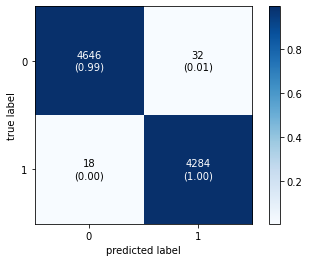

In [50]:
from sklearn.linear_model import PassiveAggressiveClassifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  PassiveAggressiveClassifier())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()
